In [1]:
#A_ch03_002.ipynbtr

In [2]:
#step 0: 載入 breast_cancer datasets
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer=load_breast_cancer()

In [3]:
#step 1: train_test_split
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,random_state=1)

In [4]:
#step 1.1 : 檢視 data shape, 426個 train 資料點 / 143個 test 資料點 皆有 30 個特徵
print('X_train.shape :',X_train.shape,' X_test.shape :',X_test.shape)

X_train.shape : (426, 30)  X_test.shape : (143, 30)


In [5]:
#step 1.2: 檢視 cancer dataset 中，每個特徵的最大和最小值
import matplotlib.pyplot as plt
%matplotlib inline

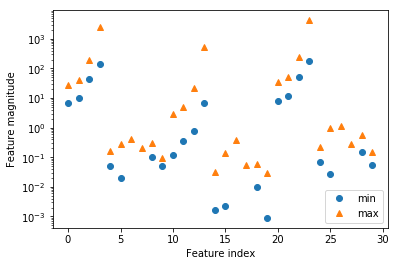

In [6]:
plt.plot(X_train.min(axis=0), 'o',label="min")
plt.plot(X_train.max(axis=0), '^',label="max")
plt.legend(loc=4)
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")
plt.yscale("log") #對數尺度

In [5]:
#step 2. 載預預處理類別 MinMaxScaler, 並建一個 instance 'scaler'
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [6]:
#step 2.1 以訓練資料集 X_train 訓練 MinMaxScaler 'scaler'
#MinMaxScaler.fit(), fit preprocessing model 
#對MinMaxScaler 'scaler' 而言, fit() method 將計算訓練集裡，每個特徵值的最大與最小值
#當使用 fit() method 時, 只有提供X_train資料做縮放, y_train資料並不會被使用
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [7]:
#step 2.2 
#MinMaxScaler.transform(), 使用已經 fit 的 preprocessing model 做轉換
#使用已經fit的MinMaxScaler model 'scalar' 對資料集 'X_train' 做轉換
#轉換後的資料集命名為 'X_train_scaled'
X_train_scaled=scaler.transform(X_train)

In [8]:
#檢視轉換後資料集 'X_train_scaled', data shape
print('X_train.shape : ',X_train.shape,'  X_train_scaled.shape : ',X_train_scaled.shape)

X_train.shape :  (426, 30)   X_train_scaled.shape :  (426, 30)


In [15]:
#X_train 第一個資料點
X_train[0]

array([1.522e+01, 3.062e+01, 1.034e+02, 7.169e+02, 1.048e-01, 2.087e-01,
       2.550e-01, 9.429e-02, 2.128e-01, 7.152e-02, 2.602e-01, 1.205e+00,
       2.362e+00, 2.265e+01, 4.625e-03, 4.844e-02, 7.359e-02, 1.608e-02,
       2.137e-02, 6.142e-03, 1.752e+01, 4.279e+01, 1.287e+02, 9.150e+02,
       1.417e-01, 7.917e-01, 1.170e+00, 2.356e-01, 4.089e-01, 1.409e-01])

In [16]:
#X_train_scaled 第一個資料點
X_train_scaled[0]

array([0.389938  , 0.70713561, 0.4119273 , 0.24322375, 0.4709759 ,
       0.70821487, 0.59746954, 0.46863817, 0.53939394, 0.46758954,
       0.05254379, 0.18670438, 0.0756255 , 0.02960041, 0.09899038,
       0.34689218, 0.18583333, 0.30460314, 0.22786541, 0.18128049,
       0.34115973, 0.82009595, 0.38990986, 0.17936492, 0.46575976,
       0.83944828, 1.        , 0.80962199, 0.59957224, 0.91755006])

In [11]:
#轉換前 (X_train) 每個特徵最小和最大值:
print('轉換前最小值:\n {}'.format(X_train.min(axis=0)))
print('轉換前最大值:\n {}'.format(X_train.max(axis=0)))

轉換前最小值:
 [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
轉換前最大值:
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]


In [13]:
#轉換後 (X_train_scaled) 每個特徵最小和最大值:
print('轉換後最小值:\n {}'.format(X_train_scaled.min(axis=0)))
print('轉換後最大值:\n {}'.format(X_train_scaled.max(axis=0)))

轉換後最小值:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
轉換後最大值:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [17]:
#如上，我們以 'X_train' 資料集來訓練(fit) MinMaxScaler model --> 'scaler'
#再以 'scaler' 來轉換 'X_train' 成為 'X_train_scaled' 資料集
#你會發覺資料集('X_train','X_train_scaled') shape 未改變,
#但是 'X_train_scaled' 的每個特徵最小值變為 0,最大值變為 1
#我們以 MinMaxScaler model 'scaler' 將資料「壓縮」在 0 與 1間

In [18]:
# step 3 : 以相同的('scaler') 對 X_test 做轉換  
# 在使用「核心化SVM」之前，測試資料 'X_test' 一樣得做縮放
# 我們使用前面已 fit 的 MinMaxScaler 'scaler' 做轉換, 轉換後資料集命名為 'X_test_scaled'
X_test_scaled=scaler.transform(X_test)

In [19]:
#檢視 'X_test_scaled'
#轉換後 (X_test_scaled) 每個特徵最小和最大值:
print('轉換後最小值:\n {}'.format(X_test_scaled.min(axis=0)))
print('轉換後最大值:\n {}'.format(X_test_scaled.max(axis=0)))

轉換後最小值:
 [ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
轉換後最大值:
 [0.9578778  0.81501522 0.95577362 0.89353128 0.81132075 1.21958701
 0.87956888 0.9333996  0.93232323 1.0371347  0.42669616 0.49765736
 0.44117231 0.28371044 0.48703131 0.73863671 0.76717172 0.62928585
 1.33685792 0.39057253 0.89612238 0.79317697 0.84859804 0.74488793
 0.9154725  1.13188961 1.07008547 0.92371134 1.20532319 1.63068851]


In [20]:
#!!!, 'X_test_scaled', 最小/大值,並不是0/1 !,這是對的!
#
#這是因為 'scaler' 這個 MinMaxScaler model,是以資料集 'X_train' 來訓練(fit),
#當用 'scaler' 對其他資料集(例如 X_test) 做轉換時, 它仍是減去 X_train 的最小值,
#並除以 X_train 的範圍，因而造成 'X_test_scaled', 並不是縮放在 0 與 1 間 

In [21]:
#*******************************************
#用相同方式縮放訓練和測試資料集               *
#*******************************************

In [22]:
#套用和訓練集相同的轉換方式到測試集是很重要，我們以 A_ch03_002a.ipynb 來說明:

In [23]:
#=======================================================================
#data preprocessing 對監督式學習的影響 

In [24]:
#step 4. 比較有無使用 MinMaxScaler 在 SVC 演算法的差別 

In [25]:
#step 4.1 以原始資料 fit SVC
from sklearn.svm import SVC

In [26]:
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,
                                               random_state=0)

In [27]:
svm=SVC(C=100) 

In [28]:
svm.fit(X_train,y_train) #以原始資料 fit SVC 'svm'

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [29]:
#score svm
svm.score(X_test,y_test)

0.6293706293706294

In [30]:
#非常低的 accuracy

In [31]:
#step 4.2 : 先以 MinMaxScaler 縮放資料後, 再以此資料 fit SVC model

In [32]:
scaler=MinMaxScaler() #建立一個 MinMaxScaler object 'scaler'

In [33]:
scaler.fit(X_train) #以 X_train fit 'scaler'

MinMaxScaler(copy=True, feature_range=(0, 1))

In [34]:
#step 4.2.1
#使用 'scaler' 對 X_train 及 X_test 做轉換(同時縮放)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [35]:
#step 4.2.2
#用縮放後的資料 fit SVC model 'svm2'
svm2=SVC(C=100)
svm2.fit(X_train_scaled,y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [36]:
#step 4.2.3
#score svm2
svm2.score(X_test_scaled,y_test)

0.965034965034965

In [37]:
#縮放資料的的效果在SVC上有很顯著的影響!

In [ ]:
#練習: 改用 StandardScaler 做前處理